<a href="https://colab.research.google.com/github/manasdutta04/Cognifyz-Technologies-Internship/blob/main/Level 3/Level 3-Task 1 Restaurant Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:

df = pd.read_csv('Dataset.csv')
print(df.head())
reviews = df['Rating text']

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
df['Review text'] = df['Rating text'].fillna('')

In [6]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [7]:
def get_sentiment_score(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = reviews.apply(get_sentiment_score)
df['Sentiment'] = df['Sentiment Score'].apply(lambda score: 'Positive' if score >= 0 else 'Negative')


In [8]:
positive_keywords = {}
negative_keywords = {}

stop_words = set(stopwords.words('english'))

for index, row in df.iterrows():
    words = nltk.word_tokenize(row['Review text'].lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

    for word in filtered_words:
        if row['Sentiment'] == 'Positive':
            positive_keywords[word] = positive_keywords.get(word, 0) + 1
        else:
            negative_keywords[word] = negative_keywords.get(word, 0) + 1

In [9]:
top_positive_keywords = dict(sorted(positive_keywords.items(), key=lambda item: item[1], reverse=True)[:10])
top_negative_keywords = dict(sorted(negative_keywords.items(), key=lambda item: item[1], reverse=True)[:10])


print("Top 10 Positive Keywords:", top_positive_keywords)
print("Top 10 Negative Keywords:", top_negative_keywords)

Top 10 Positive Keywords: {'average': 3737, 'good': 3179, 'rated': 2148, 'excellent': 301}
Top 10 Negative Keywords: {'poor': 186}


In [10]:

df['Review Length'] = df['Review text'].apply(lambda x: len(nltk.word_tokenize(x)))
average_review_length = df['Review Length'].mean()


In [11]:
print("Average Review Length:", average_review_length)


Average Review Length: 1.3378703800649148


In [12]:
import matplotlib.pyplot as plt


In [13]:
df['Rating color'] = pd.to_numeric(df['Rating color'], errors='coerce')

In [14]:
average_length_by_rating = df.groupby('Rating color')['Review Length'].mean()


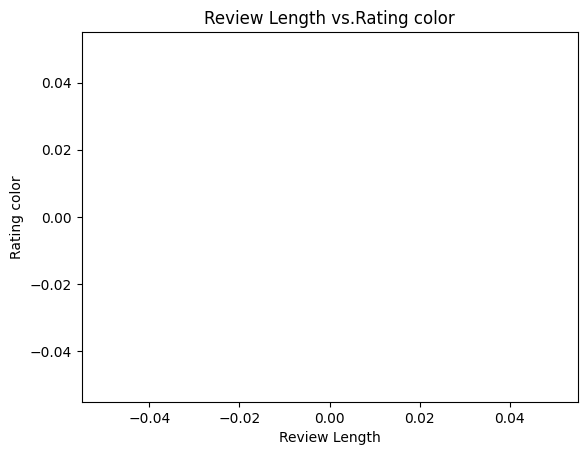

In [15]:
plt.scatter(df['Review Length'], df['Rating color'])
plt.xlabel('Review Length')
plt.ylabel('Rating color')
plt.title('Review Length vs.Rating color')
plt.show()


In [16]:
correlation_coefficient = df['Review Length'].corr(df['Rating color'])
print("Correlation Coefficient between Review Length and Rating color:", correlation_coefficient)

Correlation Coefficient between Review Length and Rating color: nan
